In [1]:
import pandas, numpy, umap
import matplotlib, matplotlib.pyplot
import sklearn, sklearn.preprocessing, sklearn.decomposition
import scipy, scipy.stats
import statsmodels, statsmodels.api
import multiprocessing, multiprocessing.pool

matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14})
matplotlib.rcParams['pdf.fonttype']=42

threads = 4

In [2]:
def histogrammer(theData):

    '''
    This function creates a histogram.
    '''    

    x=[]; y=[]
    
    binSize=0.1
    left=0
    right=5
    rightBins=numpy.arange(left+binSize,right+binSize,binSize)
    n,bins=numpy.histogram(theData,bins=rightBins)

    halfBin=(bins[1]-bins[0])/2.
    for bin in bins:
        center=bin+halfBin
        x.append(center)
    x.pop()
    y=numpy.array(n)
    y=list(y/float(sum(y)))

    return x,y

# 0. user-defined variables

In [3]:
expression_file = '/Users/alopez/projects_isb/cdi/results/deseq2/unfiltered/DESeq2_TPM_values.tsv'

# 1. read file

In [4]:
df = pandas.read_csv(expression_file,sep='\t',index_col=0)
df = df.T

print(df.shape)
print(df.index)
df.head()

(24, 51504)
Index(['01_MM1S_0hr_R1', '02_MM1S_0hr_R2', '03_MM1S_0hr_R3', '04_MM1S_1hr_R1',
       '05_MM1S_1hr_R2', '06_MM1S_1hr_R3', '07_MM1S_4hr_R1', '08_MM1S_4hr_R2',
       '09_MM1S_4hr_R3', '10_MM1S_24hr_R1', '11_MM1S_24hr_R2',
       '12_MM1S_24hr_R3', '13_hFOB-MM1S_0hr_R1', '14_hFOB-MM1S_0hr_R2',
       '15_hFOB-MM1S_0hr_R3', '16_hFOB-MM1S_1hr_R1', '17_hFOB-MM1S_1hr_R2',
       '18_hFOB-MM1S_1hr_R3', '19_hFOB-MM1S_4hr_R1', '20_hFOB-MM1S_4hr_R2',
       '21_hFOB-MM1S_4hr_R3', '22_hFOB-MM1S_24hr_R1', '23_hFOB-MM1S_24hr_R2',
       '24_hFOB-MM1S_24hr_R3'],
      dtype='object')


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283602,ENSG00000283617,ENSG00000283632,ENSG00000283633,ENSG00000283638,ENSG00000283652,ENSG00000283663,ENSG00000283684,ENSG00000283685,ENSG00000283697
01_MM1S_0hr_R1,0.0,0.0,73.429785,0.883373,11.402334,0.0,0.016486,4.436341,1.073170,1.502639,...,0.0,0.0,0.0,0.490343,0.0,0.0,0.0,0.0,0.0,0.000000
02_MM1S_0hr_R2,0.0,0.0,47.928034,0.586043,12.576899,0.0,0.048554,3.085410,1.114516,1.605050,...,0.0,0.0,0.0,0.706125,0.0,0.0,0.0,0.0,0.0,0.000000
03_MM1S_0hr_R3,0.0,0.0,5.867913,0.625772,2.295970,0.0,0.000000,1.082840,0.191048,0.102919,...,0.0,0.0,0.0,0.053698,0.0,0.0,0.0,0.0,0.0,0.000000
04_MM1S_1hr_R1,0.0,0.0,54.056058,1.604451,11.598384,0.0,0.015992,4.384928,3.244366,2.895801,...,0.0,0.0,0.0,0.364112,0.0,0.0,0.0,0.0,0.0,0.072706
05_MM1S_1hr_R2,0.0,0.0,18.754940,1.598432,13.300640,0.0,0.000000,4.479570,5.490006,4.932050,...,0.0,0.0,0.0,0.190601,0.0,0.0,0.0,0.0,0.0,0.000000


# 2. data exploration 

## 2.1. expression distributions

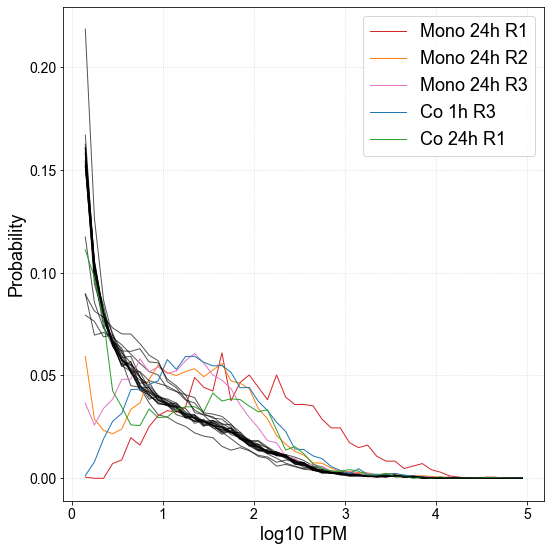

In [5]:
matplotlib.pyplot.figure(None, (8,8))
for element in df.index:
    the_data = numpy.log10(numpy.array(df.loc[element])+1)
    x, y = histogrammer(the_data)
    
    if '10' in element:
        matplotlib.pyplot.plot(x,y,'-',color='tab:red',lw=1,label='Mono 24h R1')
    elif '18' in element:
        matplotlib.pyplot.plot(x, y, '-',color='tab:blue',lw=1,label='Co 1h R3')
    elif '22' in element:
        matplotlib.pyplot.plot(x, y, '-',color='tab:green',lw=1,label='Co 24h R1')
    elif '11' in element:
        matplotlib.pyplot.plot(x, y, '-',color='tab:orange',lw=1,label='Mono 24h R2')
    elif '12' in element:
        matplotlib.pyplot.plot(x, y, '-',color='tab:pink',lw=1,label='Mono 24h R3')
    else:
        matplotlib.pyplot.plot(x,y,'-',color='black',lw=1, alpha=2/3)

matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.xlabel('log10 TPM')
matplotlib.pyplot.ylabel('Probability')
matplotlib.pyplot.tight_layout()

In [6]:
df.loc['std'] = df.std(axis=0)
df.loc['mean'] = df.mean(axis=0)
df.tail()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283602,ENSG00000283617,ENSG00000283632,ENSG00000283633,ENSG00000283638,ENSG00000283652,ENSG00000283663,ENSG00000283684,ENSG00000283685,ENSG00000283697
22_hFOB-MM1S_24hr_R1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
23_hFOB-MM1S_24hr_R2,3.969980,0.0,72.087890,0.321174,4.751830,0.000000,0.699013,6.269400,2.945512,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
24_hFOB-MM1S_24hr_R3,6.924330,0.0,83.141610,2.112794,7.169386,0.000000,3.334307,19.411200,6.675610,6.511180,...,0.0,0.0,0.0,0.623611,0.0,0.0,0.000000,0.000000,0.0,1.844440
std,1.586619,0.0,37.935672,2.631650,7.875621,0.024813,0.732487,3.807679,5.013270,8.264204,...,0.0,0.0,0.0,0.300178,0.0,0.0,0.024650,0.029542,0.0,0.373089
mean,0.546125,0.0,65.940708,1.482556,11.737215,0.009771,0.315292,4.225483,4.626328,3.887742,...,0.0,0.0,0.0,0.382490,0.0,0.0,0.005816,0.006971,0.0,0.118967


In [7]:
# remove transcripts below average 10 TPMs
subset = df.loc[:, df.loc['mean'] >= 10]

print(subset.shape)
subset.tail()

(26, 5465)


,ENSG00000000419,ENSG00000000460,ENSG00000001497,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,ENSG00000002834,ENSG00000002919,ENSG00000003056,...,ENSG00000278249,ENSG00000278615,ENSG00000278677,ENSG00000279877,ENSG00000280789,ENSG00000280893,ENSG00000281398,ENSG00000281501,ENSG00000282199,ENSG00000283149
22_hFOB-MM1S_24hr_R1,0.000000,0.000000,0.000000,2.113820,282.355963,151.138000,0.00000,23.091800,0.000000,0.000000,...,254.681000,0.000000,0.00000,26.630100,0.000000,62.190800,0.000000,0.000000,0.000000,0.000000
23_hFOB-MM1S_24hr_R2,72.087890,4.751830,7.386640,258.470810,20.855090,126.409500,80.19315,29.044240,14.735840,28.357573,...,35.279700,144.221700,16.99570,19.294100,11.255400,17.116100,22.317170,35.083900,8.305620,0.000000
24_hFOB-MM1S_24hr_R3,83.141610,7.169386,14.452186,238.729790,45.582841,222.684180,75.54931,112.889021,12.650300,44.165510,...,41.753300,105.810700,24.77790,13.171500,6.530790,26.828100,19.973130,25.250700,4.105780,32.452200
std,37.935672,7.875621,7.147769,101.058831,63.691794,53.974919,26.55269,40.032930,10.255484,28.318194,...,52.302831,88.599277,38.09393,26.065474,15.667191,47.095832,13.714219,33.273998,7.025840,21.647381
mean,65.940708,11.737215,14.379098,239.936558,48.442913,34.848491,25.82155,78.857937,18.864536,38.444705,...,17.199279,121.583861,14.26633,28.584799,25.970806,76.948465,12.331418,22.962438,10.668278,18.119853


In [8]:
# remove noisy transcripts, i.e., average rsem > 0.3
sample_names = []
for sample_name in subset.index:
    if '_' in sample_name:
        broken = sample_name.split('_') 
        new_label = '_' + broken[1] + '_' + broken[2]
        sample_names.append(new_label)
unique = list(set(sample_names))
full_samples = [element  for element in unique if sample_names.count(element) == 3]
print(full_samples)

grouped_replicates = []
for label in full_samples:
    working_samples = [sample for sample in subset.index if label in sample]
    grouped_replicates.append(working_samples)
print(grouped_replicates)

['_hFOB-MM1S_0hr', '_hFOB-MM1S_1hr', '_hFOB-MM1S_24hr', '_hFOB-MM1S_4hr', '_MM1S_0hr', '_MM1S_1hr', '_MM1S_4hr', '_MM1S_24hr']
[['13_hFOB-MM1S_0hr_R1', '14_hFOB-MM1S_0hr_R2', '15_hFOB-MM1S_0hr_R3'], ['16_hFOB-MM1S_1hr_R1', '17_hFOB-MM1S_1hr_R2', '18_hFOB-MM1S_1hr_R3'], ['22_hFOB-MM1S_24hr_R1', '23_hFOB-MM1S_24hr_R2', '24_hFOB-MM1S_24hr_R3'], ['19_hFOB-MM1S_4hr_R1', '20_hFOB-MM1S_4hr_R2', '21_hFOB-MM1S_4hr_R3'], ['01_MM1S_0hr_R1', '02_MM1S_0hr_R2', '03_MM1S_0hr_R3'], ['04_MM1S_1hr_R1', '05_MM1S_1hr_R2', '06_MM1S_1hr_R3'], ['07_MM1S_4hr_R1', '08_MM1S_4hr_R2', '09_MM1S_4hr_R3'], ['10_MM1S_24hr_R1', '11_MM1S_24hr_R2', '12_MM1S_24hr_R3']]


In [9]:
def rsem_evaluator(gene):
    
    rsems = []
    for working_samples in grouped_replicates:
        values = subset.loc[working_samples, gene]
        v = numpy.array(values)
        
        average=numpy.median(v)
        sem=numpy.std(v)/numpy.sqrt(len(v))
        rsem=sem/numpy.mean(v)
        
        rsems.append(rsem)
    
    if numpy.mean(rsems) > 0.3:
        assessment = gene
    else:
        assessment = ''
    
    return assessment

all_genes = subset.columns.to_list()

hydra = multiprocessing.pool.Pool(threads)
results = hydra.map(rsem_evaluator, all_genes)
print(results[:100], len(results))
noisy_genes = [element for element in results if len(element) > 0]

print('noisy genes: {}'.format(len(noisy_genes)))
print('before', subset.shape)
subset.drop(columns=noisy_genes, inplace=True)
print('after', subset.shape)
subset.head()

/Users/alopez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/alopez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/alopez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/alopez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


['', '', '', '', '', '', 'ENSG00000002822', '', '', '', '', '', '', '', '', '', '', '', 'ENSG00000004777', '', 'ENSG00000004897', '', '', '', '', '', '', 'ENSG00000005206', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'ENSG00000007202', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'ENSG00000011422', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 5465
noisy genes: 316
before (26, 5465)
after (26, 5149)


/Users/alopez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ENSG00000000419,ENSG00000000460,ENSG00000001497,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002834,ENSG00000002919,ENSG00000003056,ENSG00000003400,...,ENSG00000277194,ENSG00000277887,ENSG00000278615,ENSG00000278677,ENSG00000279877,ENSG00000280789,ENSG00000280893,ENSG00000281398,ENSG00000281501,ENSG00000282199
01_MM1S_0hr_R1,73.429785,11.402334,16.609640,285.95229,7.679304,20.973766,104.101815,23.130736,38.970324,14.114597,...,0.00000,30.4726,100.97756,1.91167,22.1526,42.79490,109.1210,10.091700,20.129282,19.351500
02_MM1S_0hr_R2,47.928034,12.576899,16.554035,291.61342,8.915961,21.537971,104.694337,22.235480,39.813757,13.992633,...,0.00000,33.1312,94.67028,1.82862,24.1750,42.06280,104.7900,10.007356,24.022683,15.942697
03_MM1S_0hr_R3,5.867913,2.295970,10.473344,492.21177,1.494416,10.412429,5.692175,4.082842,11.391482,4.587068,...,3.92948,0.0000,219.84865,1.63438,33.2028,7.55267,37.3933,1.660359,13.393146,3.701677
04_MM1S_1hr_R1,54.056058,11.598384,22.311164,293.88261,17.542942,23.341174,96.808508,23.583271,47.634334,19.688798,...,4.54213,0.0000,106.74241,2.16992,28.3470,45.87800,104.7070,11.220110,20.194365,13.153541
05_MM1S_1hr_R2,18.754940,13.300640,19.474305,433.73252,23.361390,30.446700,87.475047,20.224050,51.756670,15.345330,...,6.59249,0.0000,83.01370,3.74340,45.7441,56.10680,134.5220,9.070690,17.820829,16.483400


In [10]:
# remove metadata rows
subset.drop(['mean', 'std'], inplace=True)
subset.tail()

/Users/alopez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ENSG00000000419,ENSG00000000460,ENSG00000001497,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002834,ENSG00000002919,ENSG00000003056,ENSG00000003400,...,ENSG00000277194,ENSG00000277887,ENSG00000278615,ENSG00000278677,ENSG00000279877,ENSG00000280789,ENSG00000280893,ENSG00000281398,ENSG00000281501,ENSG00000282199
20_hFOB-MM1S_4hr_R2,87.090181,15.833406,16.567880,284.10745,44.323931,14.447391,85.343099,23.922987,36.328952,21.207251,...,0.0000,10.5468,131.76439,1.56576,25.9223,30.03580,80.9664,9.048960,16.429740,13.12830
21_hFOB-MM1S_4hr_R3,115.515280,16.837866,23.109727,225.93354,43.046204,15.256942,121.424209,32.599982,47.654682,33.101632,...,0.0000,14.2819,154.03284,1.60584,19.3185,29.69450,70.3051,12.393222,15.957765,14.78200
22_hFOB-MM1S_24hr_R1,0.000000,0.000000,0.000000,2.11382,282.355963,151.138000,23.091800,0.000000,0.000000,0.000000,...,260.8540,424.0760,0.00000,0.00000,26.6301,0.00000,62.1908,0.000000,0.000000,0.00000
23_hFOB-MM1S_24hr_R2,72.087890,4.751830,7.386640,258.47081,20.855090,126.409500,29.044240,14.735840,28.357573,6.796630,...,91.4046,0.0000,144.22170,16.99570,19.2941,11.25540,17.1161,22.317170,35.083900,8.30562
24_hFOB-MM1S_24hr_R3,83.141610,7.169386,14.452186,238.72979,45.582841,222.684180,112.889021,12.650300,44.165510,12.708390,...,37.4164,91.0393,105.81070,24.77790,13.1715,6.53079,26.8281,19.973130,25.250700,4.10578


## 2.2. log transformation

In [11]:
log2_df = numpy.log2(subset+1)
log2_df.head()

,ENSG00000000419,ENSG00000000460,ENSG00000001497,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002834,ENSG00000002919,ENSG00000003056,ENSG00000003400,...,ENSG00000277194,ENSG00000277887,ENSG00000278615,ENSG00000278677,ENSG00000279877,ENSG00000280789,ENSG00000280893,ENSG00000281398,ENSG00000281501,ENSG00000282199
01_MM1S_0hr_R1,6.217808,3.632540,4.138294,8.164667,3.117579,4.457710,6.715644,4.592800,5.320857,3.917871,...,0.000000,4.976024,6.672108,1.541847,4.533102,5.452691,6.782946,3.471409,4.401172,4.347063
02_MM1S_0hr_R2,5.612589,3.763082,4.133731,8.192852,3.309753,4.494286,6.723754,4.538258,5.350984,3.906182,...,0.000000,5.093019,6.579999,1.500098,4.653920,5.428370,6.725059,3.460396,4.645165,4.082592
03_MM1S_0hr_R3,2.779872,1.720703,3.520214,8.946063,1.318702,3.512534,2.742475,2.345635,3.631277,2.482091,...,2.301435,0.000000,7.786914,1.397463,5.096043,3.096375,5.262783,1.411621,3.847310,2.233175
04_MM1S_1hr_R1,5.782829,3.655167,4.542949,8.203997,4.212798,4.605327,6.611888,4.619605,5.603903,4.370778,...,2.470441,0.000000,6.751442,1.664446,4.875141,5.550839,6.723927,3.611185,4.405609,3.823091
05_MM1S_1hr_R2,4.304142,3.838008,4.355743,8.763984,4.606525,4.974837,6.467199,4.407628,5.721282,4.030807,...,2.924573,0.000000,6.392553,2.245922,5.546712,5.835591,7.082383,3.332091,4.234258,4.127914


# 3. dimensionality reduction on HVTs

## 3.1. PCA

In [12]:
standarized = sklearn.preprocessing.StandardScaler().fit_transform(log2_df)
print(standarized.shape)
print(standarized[:,0], numpy.mean(standarized[:,0]), numpy.var(standarized[:,0]))

(24, 5149)
[ 0.40747328  0.1314382  -1.16054003  0.20908321 -0.46533363  0.17996791
  0.53145129  0.34939051  0.27166251 -2.42841565  0.60836352 -2.42841565
  0.60989659  0.61020864  0.5722887   0.43530085  0.55964651  0.76701996
  0.56353651  0.51834963  0.70236703 -2.42841565  0.39550194  0.48817381] 1.850371707708594e-17 1.0


In [13]:
pca = sklearn.decomposition.PCA(n_components = 2)
PCs = pca.fit_transform(standarized)
print(PCs.shape)

(24, 2)


In [14]:
the_colors = []
for element in log2_df.index:
    
    print(element)
        
    if '_0hr' in element:
        the_color = 'tab:blue'
    elif '_1hr' in element:
        the_color = 'tab:green'
    elif '_4hr' in element:
        the_color = 'tab:orange'
    elif '_24hr' in element:
        the_color = 'tab:red'
    else:
        print('error')
    the_colors.append(the_color)

the_markers = []
for element in log2_df.index:
    if 'hFOB' in element:
        the_marker = 's'
    else:
        the_marker = 'o'
    the_markers.append(the_marker)

01_MM1S_0hr_R1
02_MM1S_0hr_R2
03_MM1S_0hr_R3
04_MM1S_1hr_R1
05_MM1S_1hr_R2
06_MM1S_1hr_R3
07_MM1S_4hr_R1
08_MM1S_4hr_R2
09_MM1S_4hr_R3
10_MM1S_24hr_R1
11_MM1S_24hr_R2
12_MM1S_24hr_R3
13_hFOB-MM1S_0hr_R1
14_hFOB-MM1S_0hr_R2
15_hFOB-MM1S_0hr_R3
16_hFOB-MM1S_1hr_R1
17_hFOB-MM1S_1hr_R2
18_hFOB-MM1S_1hr_R3
19_hFOB-MM1S_4hr_R1
20_hFOB-MM1S_4hr_R2
21_hFOB-MM1S_4hr_R3
22_hFOB-MM1S_24hr_R1
23_hFOB-MM1S_24hr_R2
24_hFOB-MM1S_24hr_R3


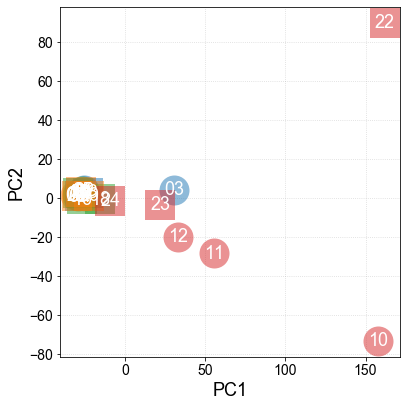

In [15]:
matplotlib.pyplot.figure(None, (6,6))
for i in range(PCs.shape[0]):
    matplotlib.pyplot.plot(PCs[i,0], PCs[i,1], marker=the_markers[i], color=the_colors[i], ms=30, alpha=0.5, mew=0)
    label = log2_df.index[i][:2]
    matplotlib.pyplot.text(PCs[i,0], PCs[i,1], s=label, horizontalalignment='center', verticalalignment='center', color='w')
    
matplotlib.pyplot.xlabel('PC1')
matplotlib.pyplot.ylabel('PC2')
matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

## 3.2. UMAP

UMAP(a=None, angular_rp_forest=True, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='cosine',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=3, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=1, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Jul  8 08:36:18 2020 Finding Nearest Neighbors
Wed Jul  8 08:36:21 2020 Finished Nearest Neighbor Search
Wed Jul  8 08:36:24 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /

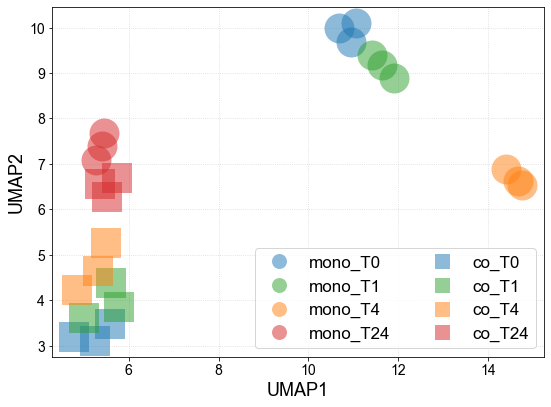

In [16]:
reducer = umap.UMAP(n_neighbors=3, metric='cosine', random_state=1, verbose=True)
embedding = reducer.fit_transform(log2_df)

matplotlib.pyplot.figure(None, (8,6))
for i in range(embedding.shape[0]):
    matplotlib.pyplot.plot(embedding[i,0], embedding[i,1], marker=the_markers[i], color=the_colors[i], ms=30, alpha=0.5, mew=0)
    label = log2_df.index[i][:2]
    #matplotlib.pyplot.text(embedding[i,0], embedding[i,1], s=label, horizontalalignment='center', verticalalignment='center', color='w')
    
# legend
from matplotlib.lines import Line2D
custom_dots = [
    Line2D([0], [0], marker='o', color='white', markerfacecolor='tab:blue', ms=30/2, alpha=0.5, mew=0),
    Line2D([0], [0], marker='o', color='white', markerfacecolor='tab:green', ms=30/2, alpha=0.5, mew=0),
    Line2D([0], [0], marker='o', color='white', markerfacecolor='tab:orange', ms=30/2, alpha=0.5, mew=0),
    Line2D([0], [0], marker='o', color='white', markerfacecolor='tab:red', ms=30/2, alpha=0.5, mew=0),
    Line2D([0], [0], marker='s', color='white', markerfacecolor='tab:blue', ms=30/2, alpha=0.5, mew=0),
    Line2D([0], [0], marker='s', color='white', markerfacecolor='tab:green', ms=30/2, alpha=0.5, mew=0),
    Line2D([0], [0], marker='s', color='white', markerfacecolor='tab:orange', ms=30/2, alpha=0.5, mew=0),
    Line2D([0], [0], marker='s', color='white', markerfacecolor='tab:red', ms=30/2, alpha=0.5, mew=0)
]
matplotlib.pyplot.legend(custom_dots, ['mono_T0', 'mono_T1', 'mono_T4', 'mono_T24', 'co_T0', 'co_T1', 'co_T4', 'co_T24'], ncol=2, fontsize=17, loc=4)
    
matplotlib.pyplot.xlabel('UMAP1')
matplotlib.pyplot.ylabel('UMAP2')
matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()